## Observations and Insights 

In [ ]:
#Capomulin is the most effective drug regiment.
#Infubinol is th least effective drug regiment.
#The larger the mouse the higher the tumor volume they would have.

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [24]:
# Checking the number of mice.

total_mice = merged_df["Mouse ID"].nunique()

total_mice

249

In [25]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = merged_df.loc[merged_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

merged_duplicates_removed_df = merged_df[merged_df["Mouse ID"].isin(duplicate_mice) == False]



In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_duplicates_removed_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [27]:
# Checking the number of mice in the clean DataFrame.
total_mice_duplicates_removed = merged_duplicates_removed_df["Mouse ID"].nunique()
total_mice_duplicates_removed

248

## Summary Statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics_df = merged_duplicates_removed_df.loc[:, ["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]




In [29]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = summary_statistics_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]

median = summary_statistics_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]

variance = summary_statistics_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]

standard_deviation = summary_statistics_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]

sem = summary_statistics_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]


In [30]:
# Assemble the resulting series into a single summary dataframe.

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_deviation, "SEM": sem })

summary_format_df = summary_df.style.format({"Mean":"{:.3f}", "Median":"{:.3f}", "Variance":"{:.3f}", "Standard Deviation":"{:.3f}", "SEM":"{:.3f}"})

summary_format_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen



In [32]:
# Using the aggregation method, produce the same summary statistics in a single line

single_line_summary_df = summary_statistics_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean','median', 'var', 'std', 'sem']})


single_line_summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

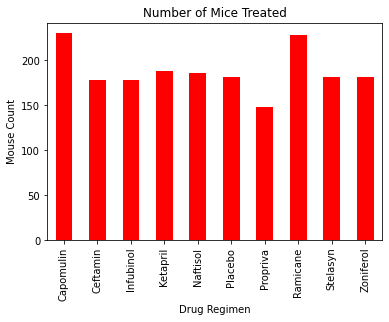

In [33]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

unique_mice_df = merged_duplicates_removed_df.groupby(["Drug Regimen"]).count()["Mouse ID"] 

unique_mice_df.plot.bar(color = 'r')


plt.xlabel("Drug Regimen")
plt.ylabel("Mouse Count")
plt.title("Number of Mice Treated")
plt.show()




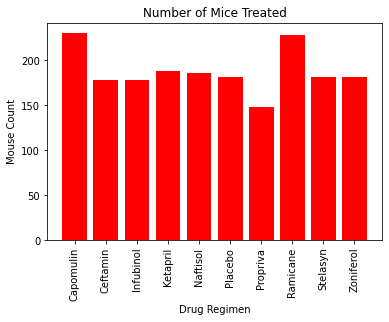

In [34]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

unique_mice_df = merged_duplicates_removed_df.groupby(["Drug Regimen"]).count()["Mouse ID"]


y_axis = unique_mice_df.values
x_axis = unique_mice_df.index

plt.bar(x_axis, y_axis, color = 'r')

plt.xlabel("Drug Regimen")
plt.ylabel("Mouse Count")
plt.title("Number of Mice Treated")
plt.xticks(rotation = 90)
plt.show()


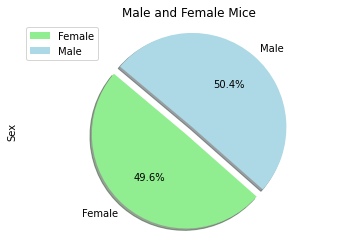

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

male_female_count = merged_duplicates_removed_df.groupby(["Sex"])

gender_count = male_female_count["Mouse ID"].nunique()

percentage_of_genders = gender_count / total_mice * 100

gender_count_df = pd.DataFrame({"Total Count": gender_count, "Percentage": percentage_of_genders})

colors = ['lightgreen', 'lightblue']
explode = (0.1, 0)

gender_count_df.plot.pie(y = 'Total Count', colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")




plt.title('Male and Female Mice')
plt.ylabel('Sex')
plt.axis('equal')
plt.show()






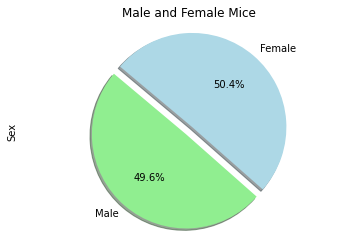

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

male_and_female_count = merged_duplicates_removed_df["Sex"].value_counts()


labels = male_and_female_count.index

sizes = [49.397590,50.200803]

colors = ['lightgreen', 'lightblue']

explode = (0.1, 0)

plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140,)

plt.title('Male and Female Mice')
plt.ylabel('Sex')
plt.axis('equal')
plt.show()






## Quartiles, Outliers and Boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ('Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin')
drug_evaluation = merged_duplicates_removed_df.loc[merged_duplicates_removed_df['Drug Regimen'].isin(treatment_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
tumor_vol_df = drug_evaluation.groupby(drug_evaluation['Mouse ID']).agg({'Timepoint':['max']})
tumor_vol_df.columns = ['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

tumor_vol_df = tumor_vol_df.reset_index()
tumor_volume_df = pd.merge(tumor_vol_df, merged_duplicates_removed_df, how = "left", on = ["Mouse ID", "Timepoint"])



tumor_volume_df.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [54]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
for x in treatment_list:
    tumor_volume_by_treatment = tumor_volume_df['Tumor Volume (mm3)'].loc[tumor_volume_df['Drug Regimen'] == x]
        
    # add subset 
    tumor_volumes.append(tumor_volume_by_treatment)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume_by_treatment.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lowerb = lowerq - (1.5*iqr)
    upperb = upperq + (1.5*iqr)
    print(f'The interquartile range for {x} is {round(iqr, 2)}')
    print(f'If {x} leads to a tumor volume below {round(lowerb, 2)} that could mean the tumor volume is a potential outlier')
    print(f'If {x} leads to a tumor volume above {round(upperb, 2)} that could mean the tumor volume is a potential outlier')
    print(f'\n')
    

The interquartile range for Capomulin is 7.78
If Capomulin leads to a tumor volume below 20.7 that could mean the tumor volume is a potential outlier
If Capomulin leads to a tumor volume above 51.83 that could mean the tumor volume is a potential outlier


The interquartile range for Ramicane is 9.1
If Ramicane leads to a tumor volume below 17.91 that could mean the tumor volume is a potential outlier
If Ramicane leads to a tumor volume above 54.31 that could mean the tumor volume is a potential outlier


The interquartile range for Infubinol is 11.48
If Infubinol leads to a tumor volume below 36.83 that could mean the tumor volume is a potential outlier
If Infubinol leads to a tumor volume above 82.74 that could mean the tumor volume is a potential outlier


The interquartile range for Ceftamin is 15.58
If Ceftamin leads to a tumor volume below 25.36 that could mean the tumor volume is a potential outlier
If Ceftamin leads to a tumor volume above 87.67 that could mean the tumor volume

/Users/alain/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


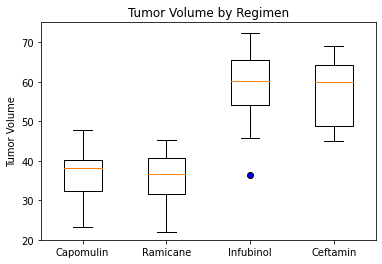

In [41]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

blue_dot = dict(markerfacecolor='b', marker='o')

fig, ax = plt.subplots()
ax.set_title('Tumor Volume by Regimen')
ax.set_xticklabels(treatment_list)
ax.set_ylabel('Tumor Volume')
ax.boxplot(tumor_volumes, flierprops = blue_dot)
plt.ylim(20, 75)
plt.show()


## Line and Scatter Plots

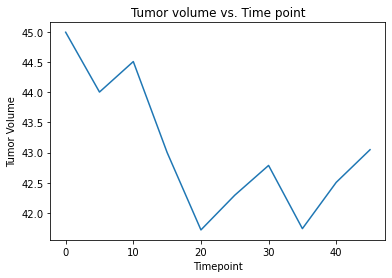

In [45]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tv_tp_capomulin = merged_duplicates_removed_df.loc[merged_duplicates_removed_df['Drug Regimen'] == 'Capomulin']
mouse_treated = merged_duplicates_removed_df.loc[merged_duplicates_removed_df['Mouse ID'] == 'a444']



plt.plot(mouse_treated["Timepoint"], mouse_treated["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title("Tumor volume vs. Time point")
plt.show()




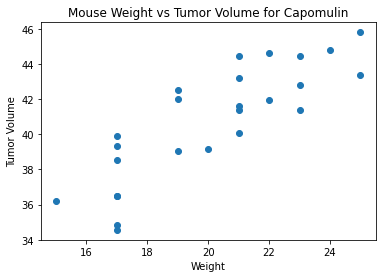

In [50]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# capomulin_weight= merged_duplicates_removed_df.loc[merged_duplicates_removed_df['Drug Regimen'] == 'Capomulin']

capomulin_weight = merged_duplicates_removed_df.loc[merged_duplicates_removed_df['Drug Regimen'] == 'Capomulin']

capomulin_avg = capomulin_weight.groupby(["Mouse ID"]).mean()

plt.scatter(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"] )
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Mouse Weight vs Tumor Volume for Capomulin")
plt.show()


## Correlation and Regression

In [69]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"])
print("The correlation coefficient is " + str(round(correlation[0],2)))


The correlation coefficient is 0.84


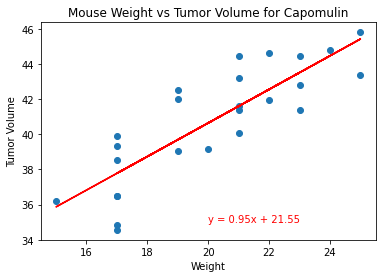

In [67]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"])
regress_values = capomulin_avg["Weight (g)"]* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"] )
plt.plot(capomulin_avg["Weight (g)"], regress_values, color='r')
plt.annotate(line_eq,(20,35), color = 'r')
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Mouse Weight vs Tumor Volume for Capomulin")
plt.show()
